In [1]:
import numpy as np
import pandas as pd
from sklearn import tree #决策树库
from sklearn.model_selection import train_test_split #分割训练集和测试集的库
import matplotlib.pyplot as plt
import graphviz

In [2]:
data = pd.read_excel(r"C:\Users\13708\OneDrive\桌面\机器学习数据\猫分类数据.xlsx")
data

,猫编号,公母,年龄,品种,毛发长度,分类
0,猫1号,0,11,8,0,好猫
1,猫2号,1,15,3,0,好猫
2,猫3号,0,10,1,0,好猫
3,猫4号,0,12,4,0,好猫
4,猫5号,0,12,2,0,好猫
5,猫6号,1,15,8,1,坏猫
6,猫7号,0,14,4,0,坏猫
7,猫8号,0,14,2,1,坏猫
8,猫9号,0,15,6,0,好猫
9,猫10号,1,14,6,1,好猫


In [3]:
data.columns

Index(['猫编号', '公母', '年龄', '品种', '毛发长度', '分类'], dtype='object')

In [4]:
data['分类'] = data['分类'].map({'好猫': 1, '坏猫': 0})

In [5]:
data

,猫编号,公母,年龄,品种,毛发长度,分类
0,猫1号,0,11,8,0,1
1,猫2号,1,15,3,0,1
2,猫3号,0,10,1,0,1
3,猫4号,0,12,4,0,1
4,猫5号,0,12,2,0,1
5,猫6号,1,15,8,1,0
6,猫7号,0,14,4,0,0
7,猫8号,0,14,2,1,0
8,猫9号,0,15,6,0,1
9,猫10号,1,14,6,1,1


In [6]:
# 特征列：选择 '公母', '年龄', '品种', '毛发长度' 作为特征
features = data[['公母', '年龄', '品种', '毛发长度']]
# 标签列：'分类'
labels = data['分类']

In [7]:
# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [23]:
# 4. 构建决策树模型
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=4,min_samples_split=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5,
                       random_state=42)

In [24]:
clf.score(X_train, y_train)

0.8571428571428571

In [25]:
clf.score(X_test, y_test)

0.5833333333333334

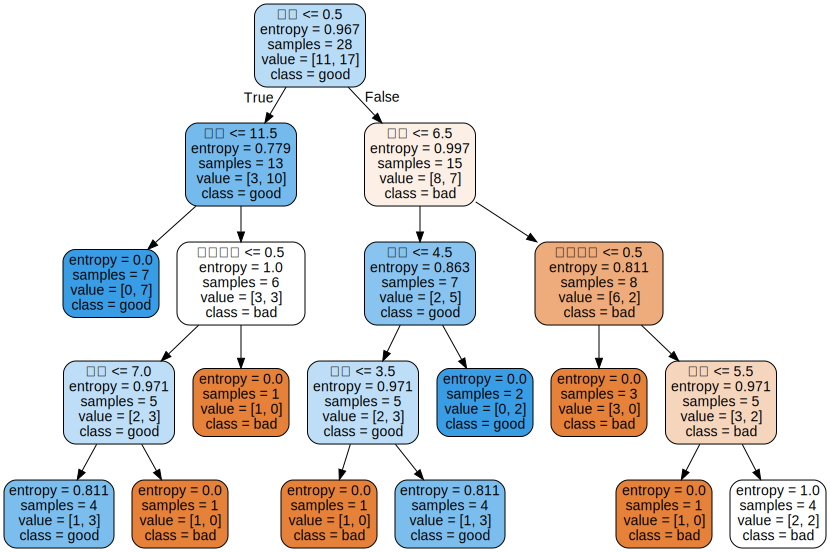

In [26]:
dot_data = tree.export_graphviz(clf,feature_names=['公母', '年龄', '品种', '毛发长度'],class_names=["bad","good"],filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph